In [14]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
from openai import AzureOpenAI
import json

load_dotenv()

True

In [15]:
csv_path = "mysunflower.csv"
data = pd.read_csv(csv_path)

Sensor Data Preview:


,time (seconds),temperature,moisture,light
0,1.426,16,0,128
1,6.439,16,0,128
2,11.447,16,0,128
3,16.449,16,0,128
4,21.468,16,0,128


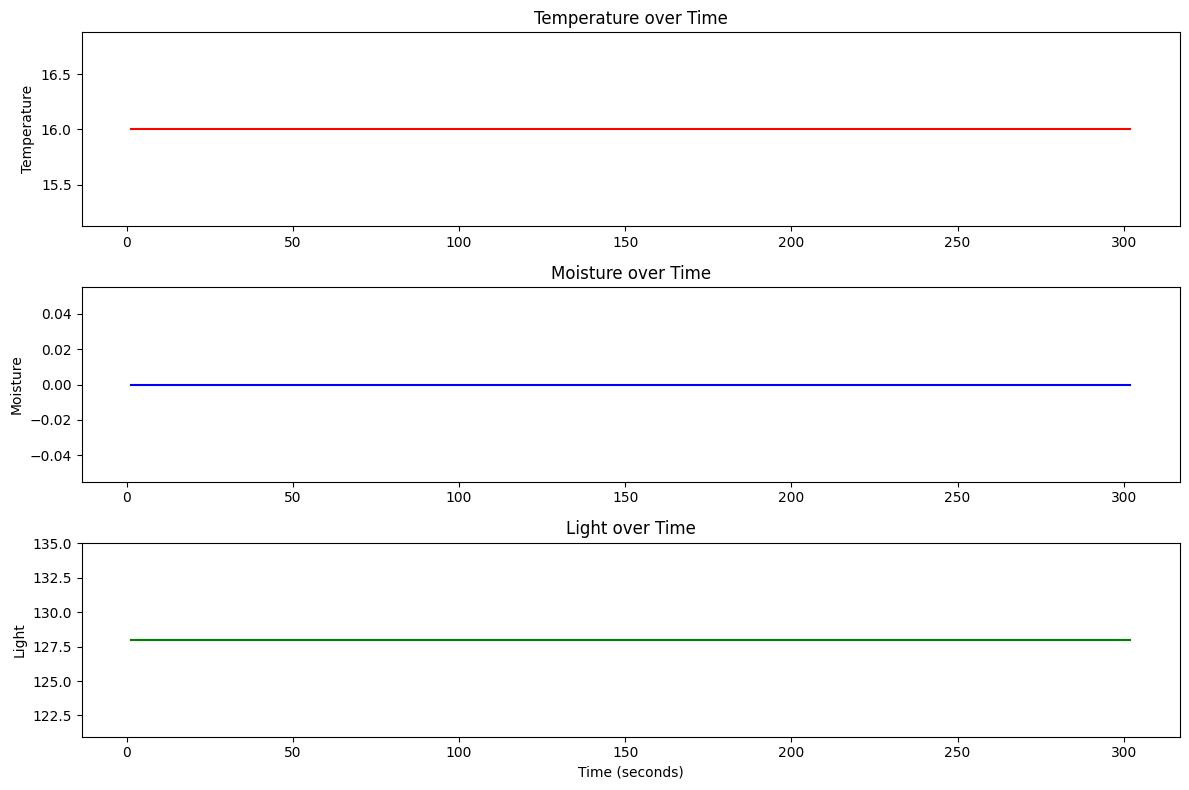

In [16]:
# Display first few rows of the data
print("Sensor Data Preview:")
display(data.head())

# Create some basic visualizations
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(data['time (seconds)'], data['temperature'], 'r-')
plt.title('Temperature over Time')
plt.ylabel('Temperature')

plt.subplot(3, 1, 2)
plt.plot(data['time (seconds)'], data['moisture'], 'b-')
plt.title('Moisture over Time')
plt.ylabel('Moisture')

plt.subplot(3, 1, 3)
plt.plot(data['time (seconds)'], data['light'], 'g-')
plt.title('Light over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Light')

plt.tight_layout()
plt.show()

In [17]:
# Create Azure OpenAI client
client = AzureOpenAI(
    api_key=os.getenv("AZURE_OPENAI_API_KEY"),  
    api_version=os.getenv("2023-12-01-preview"),
    azure_endpoint=os.getenv("AZURE_OPENAI_ENDPOINT")
)

# Prepare system message with data context
data_summary = data.describe().to_string()
data_sample = data.head(10).to_string()
with open("aboutsunflowers.txt", "r", encoding="utf-8") as file:
    aboutsunflower = file.read()

system_message = f"""
You are an agricultural AI assistant specialized in vegetable gardening and plant health monitoring. You

You have access to the following sensor data from a micro:bit device monitoring a vegetable garden:

SENSOR DATA SUMMARY:
{data_summary}

BASIL IMPORTANT INFORMATION:
{aboutsunflower}

WEATHER DATA:
It's 3pm in Portugal in March, and the weather is sunny with a temperature of 20°C. The humidity is 50%.

Analyze this data to help the user understand plant growing conditions.
Provide insights on:
1. Whether environmental conditions are suitable for common vegetables
2. Recommendations for improving growing conditions if needed
3. Interpretation of the sensor readings
4. Suggestions for additional measurements that might be useful

How the Response should be structured:
- Be educational and explain concepts clearly for students, 
- Add friendly emojis to make it engaging. 
- Respond in European Portuguese. Responde em português europeu, podes tratar as pessoas por "tu".
- Use at most 3 paragraphs.
"""

In [18]:
# Function to call Azure OpenAI
def ask_garden_assistant(question):
    response = client.chat.completions.create(
        model=os.getenv("AZURE_OPENAI_MODEL", "gpt-4o"),
        messages=[
            {"role": "system", "content": system_message},
            {"role": "user", "content": question}
        ],
        temperature=0.7,
        max_tokens=800
    )
    return response.choices[0].message.content

# Example usage
user_question = "Como é que está o meu girassol hoje? Está a crescer bem? "
response = ask_garden_assistant(user_question)
print("\nAI Response:")
print(response)


AI Response:
Olá! 🌻 Vamos analisar as condições para o teu girassol. A temperatura atual de 20°C está bastante próxima da faixa ideal para o crescimento dos girassóis (21°C a 26°C), o que é ótimo! No entanto, a humidade está a 50%, o que é aceitável, mas é importante garantir que não haja excesso de humidade, pois isso pode levar a doenças fúngicas. Além disso, o teu girassol precisa de pelo menos 6 a 8 horas de luz solar direta por dia, e como hoje está ensolarado, parece que está a ter uma boa dose de sol! ☀️

Em relação às leituras do sensor, parece que a temperatura está estável, mas a humidade do solo está a 0%, o que indica que o solo pode estar seco. É fundamental manter o solo consistentemente húmido, especialmente durante a fase inicial de crescimento. Se ainda não o fizeste, recomenda-se regar o girassol na base para evitar problemas de fungos nas folhas. 💧

Para melhorar as condições de crescimento, verifica se o solo está bem drenado e, se possível, adiciona um pouco de co